## OpenCV
# 히스토그램

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
bob = cv2.imread('bob.jpg')

In [3]:
bob_gray = cv2.cvtColor(bob, cv2.COLOR_BGR2GRAY)

### numpy 방식

In [15]:
hist, bins = np.histogram(bob_gray, bins=np.arange(257))

In [16]:
hist

array([ 248,  767,  625,  552,  932,  412,  408,  286,  263,  226,  266,
        238,  273,  280,  353,  404,  466,  629,  394,  294,  312,  283,
        302,  293,  293,  315,  332,  328,  370,  341,  354,  369,  364,
        383,  403,  436,  432,  416,  474,  474,  468,  477,  553,  541,
        635,  664,  683,  706,  723,  746,  779,  743,  788,  807,  842,
        800,  837,  864,  892,  879,  840,  878,  852,  852,  909,  871,
        868,  880,  821,  856,  857,  899,  872,  842,  821,  819,  784,
        764,  799,  754,  782,  727,  823,  734,  721,  726,  717,  741,
        727,  808,  732,  712,  776,  701,  708,  699,  739,  696,  706,
        653,  663,  656,  638,  616,  616,  654,  695,  697,  680,  643,
        666,  673,  606,  651,  574,  600,  641,  617,  653,  615,  640,
        604,  636,  626,  643,  632,  590,  578,  588,  604,  630,  613,
        574,  580,  555,  632,  633,  661,  608,  628,  622,  640,  656,
        673,  656,  638,  652,  676,  645,  690,  6

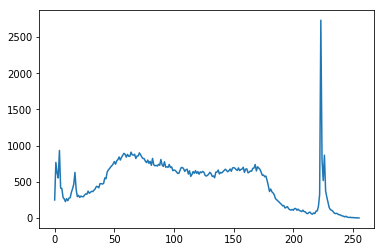

In [17]:
plt.plot(hist)

### OpenCV 방식
- calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

In [23]:
hist = cv2.calcHist([bob_gray], [0], None, [256], [0,256])

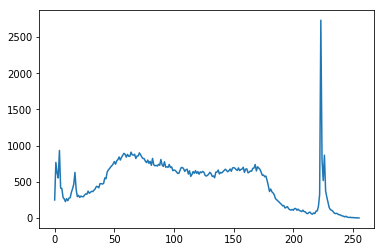

In [25]:
plt.plot(hist)

In [32]:
hist = cv2.calcHist([bob], [0], None, [256], [0,256])

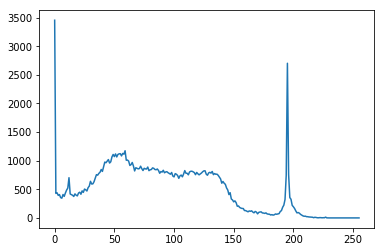

In [33]:
plt.plot(hist)

- 채널별 히스토그램

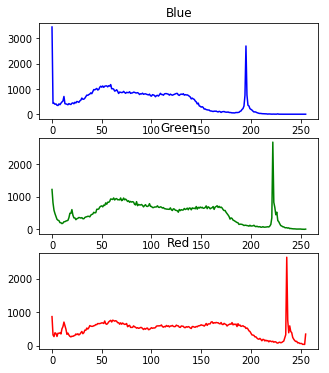

In [38]:
plt.figure(figsize=[5,6])

plt.subplot(3,1,1)
plt.title('Blue')
hist = cv2.calcHist([bob], [0], None, [256], [0,256])
plt.plot(hist, color='b')

plt.subplot(3,1,2)
plt.title('Green')
hist = cv2.calcHist([bob], [1], None, [256], [0,256])
plt.plot(hist, color='g')

plt.subplot(3,1,3)
plt.title('Red')
hist = cv2.calcHist([bob], [2], None, [256], [0,256])
plt.plot(hist, color='r')

### 히스토그램 스트레칭
- 명암비를 비례식으로 증가시킴 (어두운 영역은 더 어둡게, 밝은 영역은 더 밝게)

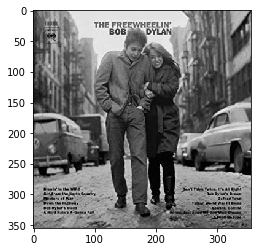

In [40]:
plt.imshow(bob_gray, cmap='gray')

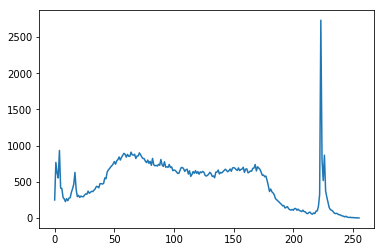

In [72]:
hist = cv2.calcHist([bob_gray], [0], None, [256], [0,256])
plt.plot(hist)

- 최소값을 50, 최대값을 200으로 잡아보자
- 50보다 작은 값은 0으로, 200보다 큰 값은 255으로 선형적으로 변형

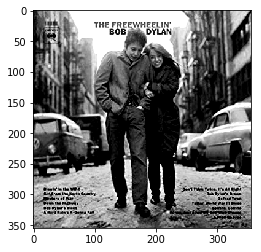

In [69]:
bob_gray2 = np.maximum(bob_gray.astype('float')-50,0)*255/(200-50)
bob_gray2 = np.minimum(bob_gray2, 255).astype('uint8')
plt.imshow(bob_gray2, cmap='gray')

### 히스토그램 평활화
- 히스토그램의 누적배열을 구한다
- 전체 픽셀수로 나누어준다
- 255를 곱해준다
- 0~255 사이의 정수(uint8) 타입으로 변환한다

In [75]:
chist = np.cumsum(hist)

In [82]:
trans = (chist*255/(355*355)).astype('uint8')

In [86]:
trans[:10]

array([0, 2, 3, 4, 6, 7, 7, 8, 9, 9], dtype=uint8)

In [87]:
trans[-10:]

array([254, 254, 254, 254, 254, 254, 255, 255, 255, 255], dtype=uint8)

In [90]:
bob_gray2 = trans[bob_gray]

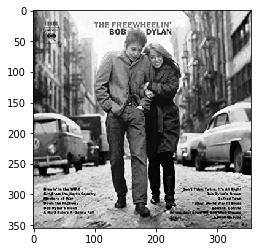

In [94]:
plt.imshow(bob_gray2, cmap='gray')

- cv2.equalizeHist() 사용

In [95]:
bob_gray3 = cv2.equalizeHist(bob_gray)

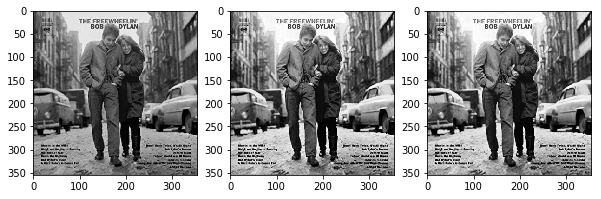

In [99]:
plt.figure(figsize=[10,5])

plt.subplot(1,3,1)
plt.imshow(bob_gray, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(bob_gray2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(bob_gray3, cmap='gray')

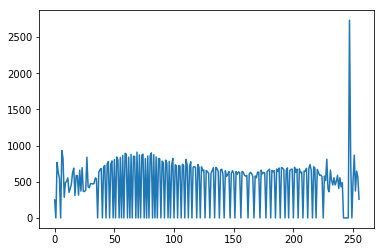

In [100]:
hist = cv2.calcHist([bob_gray3], [0], None, [256], [0,256])
plt.plot(hist)